In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

##**Loading The Dataset & Cleaning**

In [172]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [173]:
print("Shape of the data: ", df.shape)

Shape of the data:  (614, 13)


In [174]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [176]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

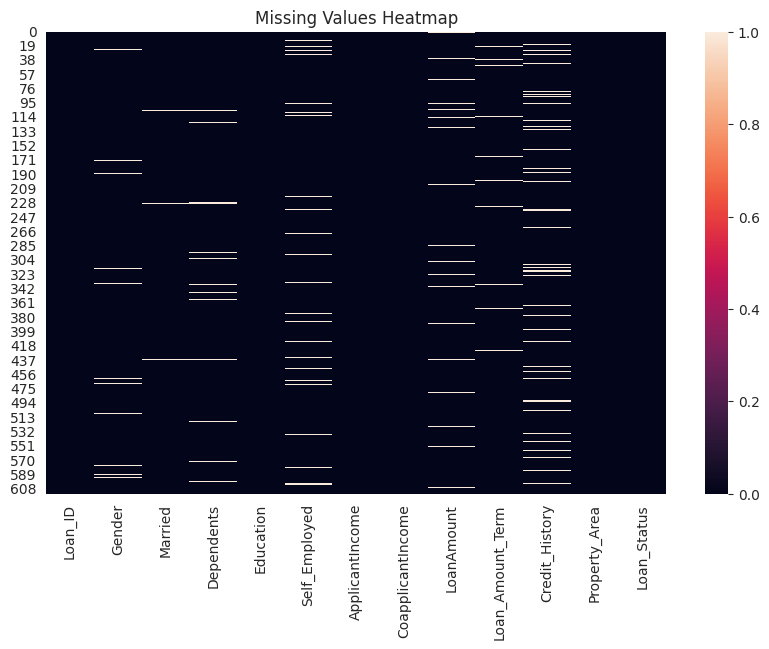

In [177]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna())
plt.title('Missing Values Heatmap')
plt.show()

###**Filling up categorical misising values**

In [178]:
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

###**Plotting the Countplot for Dependents**

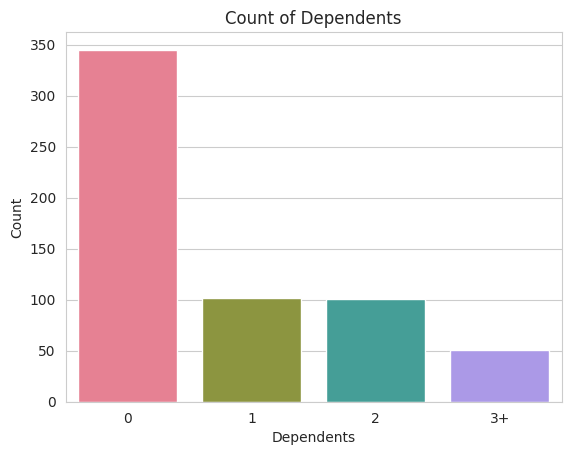

In [179]:
# Define your color palette
custom_palette = sns.color_palette("husl", 4)

# Assuming 'Dependents' is the column name in your DataFrame 'df'
sns.countplot(data=df, x='Dependents', palette=custom_palette, legend=False)
plt.title('Count of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show();

In [180]:
#as we can see filling with mode make sence here
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])

####**Now filling up numeric attributes,**

####**first we check the outliers before filling the null values**

In [181]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

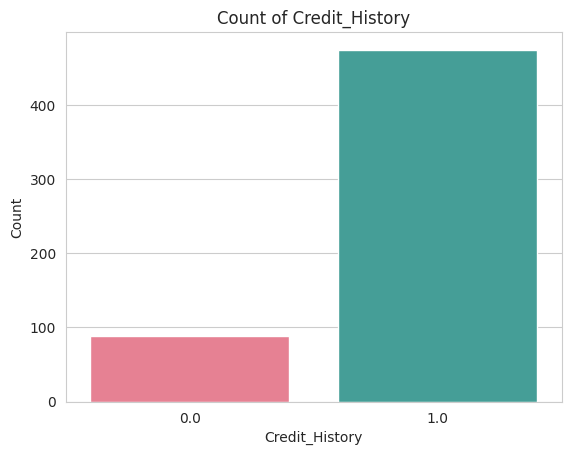

In [182]:
# Define your color palette
custom_palette = sns.color_palette("husl", 2)

# Assuming 'Dependents' is the column name in your DataFrame 'df'
sns.countplot(data=df, x='Credit_History', palette=custom_palette, legend=False)
plt.title('Count of Credit_History')
plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.show();

In [183]:
#as we can see filling with mode make sence here
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

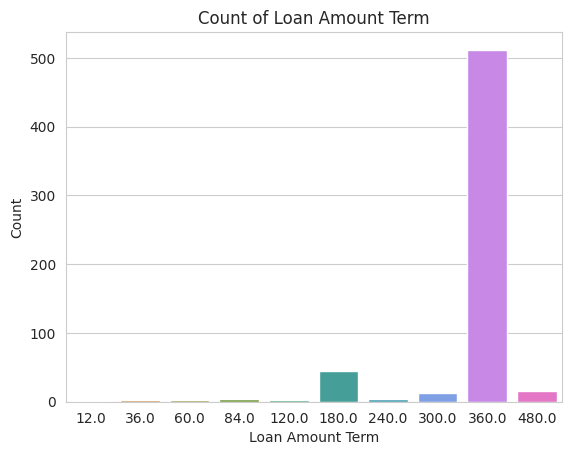

In [184]:
# Define your color palette
custom_palette = sns.color_palette("husl", 10)

# Assuming 'Dependents' is the column name in your DataFrame 'df'
sns.countplot(data=df, x='Loan_Amount_Term', palette=custom_palette, legend=False)
plt.title('Count of Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.show();

In [185]:
#360 has count of 512 so thats why replacing the loan_amount_term by mode will be good choice.
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

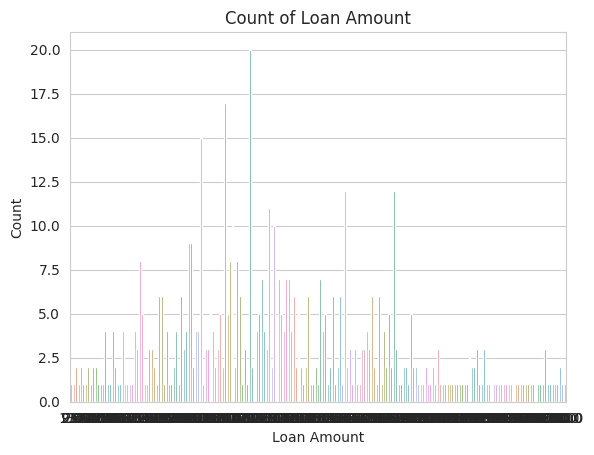

In [186]:
# Define your color palette
custom_palette = sns.color_palette("husl", 30)

# Assuming 'Dependents' is the column name in your DataFrame 'df'
sns.countplot(data=df, x='LoanAmount', palette=custom_palette, legend=False)
plt.title('Count of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show();

###**Ploting the boxplot**

<Axes: xlabel='LoanAmount'>

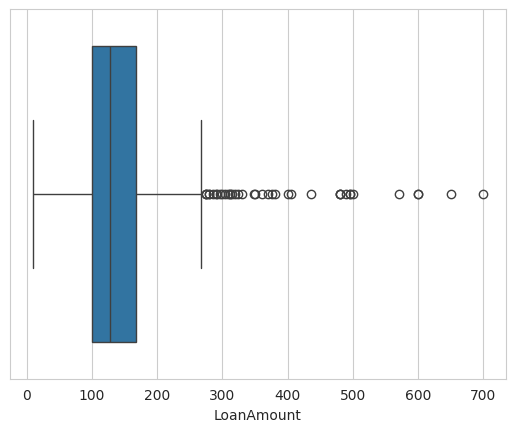

In [187]:
#we can not replace loan amount with mode because here mean or median will be better.
#before making choice beteween mean and median we have to check for outliers.
# becuase mean is affected by outliers.

sns.boxplot(x="LoanAmount", data=df)

####**Identifying Outliers using Interquartile Range (IQR) Method**

In [188]:
#It contains the outliers so we will handle that outliers using IQR methos.

Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

In [189]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -2.0
up_limit is 270.0


In [190]:
outlier = []
for x in df['LoanAmount']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is\n', outlier)

 outlier in the dataset is
 [349.0, 315.0, 320.0, 286.0, 312.0, 370.0, 650.0, 290.0, 600.0, 275.0, 700.0, 495.0, 280.0, 279.0, 304.0, 330.0, 436.0, 480.0, 300.0, 376.0, 490.0, 308.0, 570.0, 380.0, 296.0, 275.0, 360.0, 405.0, 500.0, 480.0, 311.0, 480.0, 400.0, 324.0, 600.0, 275.0, 292.0, 350.0, 496.0]


In [191]:
len(outlier)

39

####**handling the null values in LoanAmount attribute using median because it contains outliers**

In [192]:
#we will not remove the outliers becuase it has 39/592, which means it has 6.5% amount of data in whole.
#we will use median to replace the missing value.
#becuase median is not affected by the outliers.

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [193]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##**Exploratory Data Analysis**

####**Encoding 'Loan_Status' Column (Replacing 'N' with 0 and 'Y' with 1)**

In [195]:
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

####**Credit History vs Loan Status Countplot**

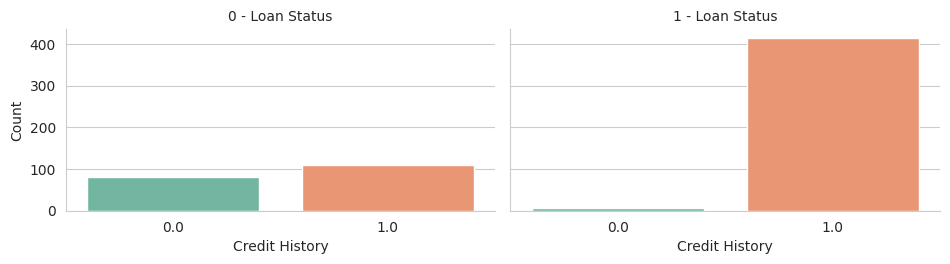

In [196]:
# Set style
sns.set_style("whitegrid")

# Define colors
palette = sns.color_palette("Set2")

# Create FacetGrid
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)

# Map countplot onto the grid
grid.map(sns.countplot, 'Credit_History', palette=palette)

# Adjust titles and labels
grid.set_titles("{col_name} - Loan Status")
grid.set_xlabels("Credit History")
grid.set_ylabels("Count")

# Adjust spacing between subplots
plt.subplots_adjust(top=0.8)

# Show plot
plt.show()

#people having credit history have easy time getting loan

####**Gender vs Loan Status Countplot**

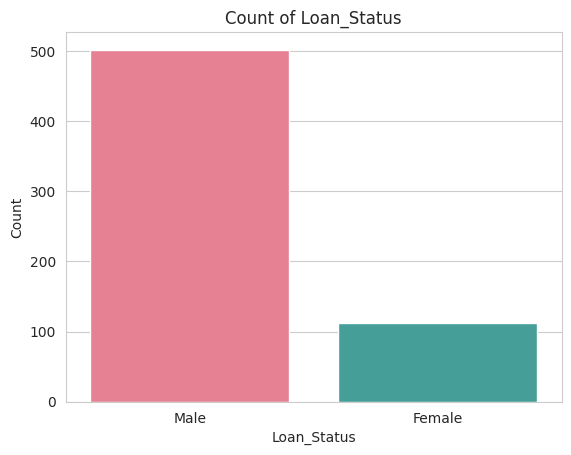

In [197]:
# Define your color palette
custom_palette = sns.color_palette("husl", 2)

# Assuming 'Dependents' is the column name in your DataFrame 'df'
sns.countplot(data=df, x='Gender', palette=custom_palette, legend=False)
plt.title('Count of Loan_Status')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show();

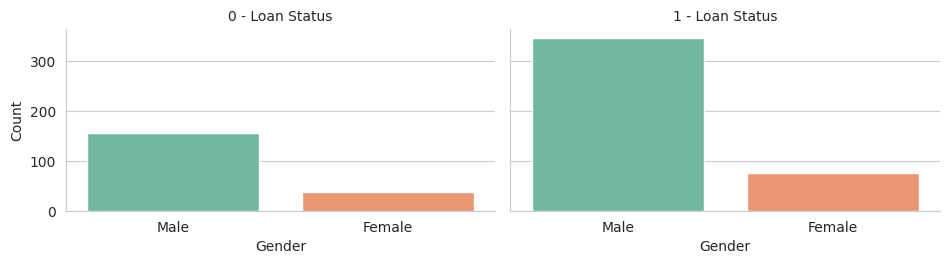

In [198]:
#Gender Vs Loan Status

# Set style
sns.set_style("whitegrid")

# Define colors
palette = sns.color_palette("Set2")

# Create FacetGrid
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)

# Map countplot onto the grid
grid.map(sns.countplot, 'Gender', palette=palette)

# Adjust titles and labels
grid.set_titles("{col_name} - Loan Status")
grid.set_xlabels("Gender")
grid.set_ylabels("Count")

# Adjust spacing between subplots
plt.subplots_adjust(top=0.8)

# Show plot
plt.show()

# chances for getting loan for female is easier compared to male.
#Loan status clearly depend upon the gender.

####**Married status vs Loan Status Countplot**

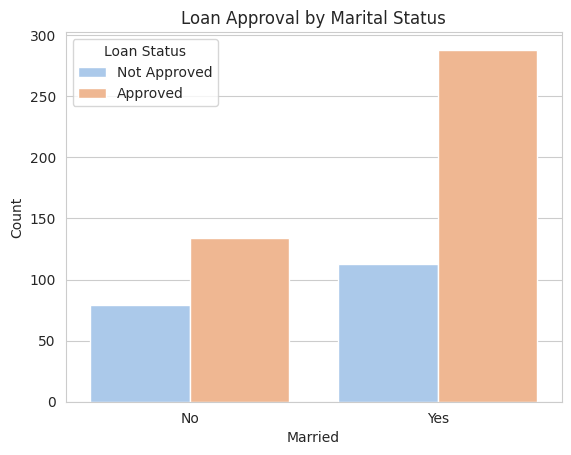

In [199]:
# Set style
sns.set_style("whitegrid")

# Define colors
palette = sns.color_palette("pastel")

# Create count plot
ax = sns.countplot(x='Married', hue='Loan_Status', data=df, palette=palette)

# Set title and labels
plt.title('Loan Approval by Marital Status')
plt.xlabel('Married')
plt.ylabel('Count')

# Customize legend
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Not Approved', 'Approved'], title='Loan Status')

# Show plot
plt.show()

#people who are married have better chance at loan approval

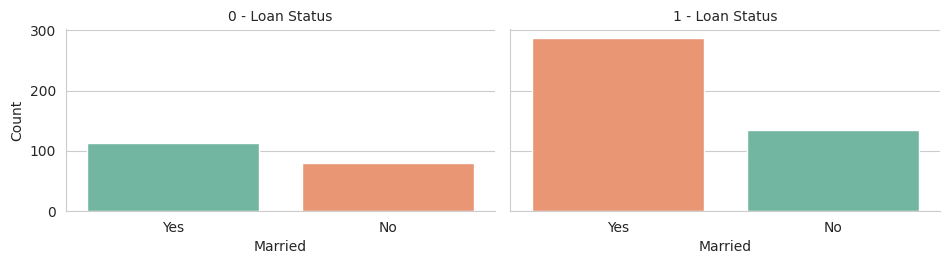

In [200]:
# Set style
sns.set_style("whitegrid")

# Define colors
palette = sns.color_palette("Set2")

# Create FacetGrid
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)

# Map countplot onto the grid
grid.map(sns.countplot, 'Married', palette=palette)

# Adjust titles and labels
grid.set_titles("{col_name} - Loan Status")
grid.set_xlabels("Married")
grid.set_ylabels("Count")

# Adjust spacing between subplots
plt.subplots_adjust(top=0.8)

# Show plot
plt.show()

####**Dependents vs Loan Status Countplot**

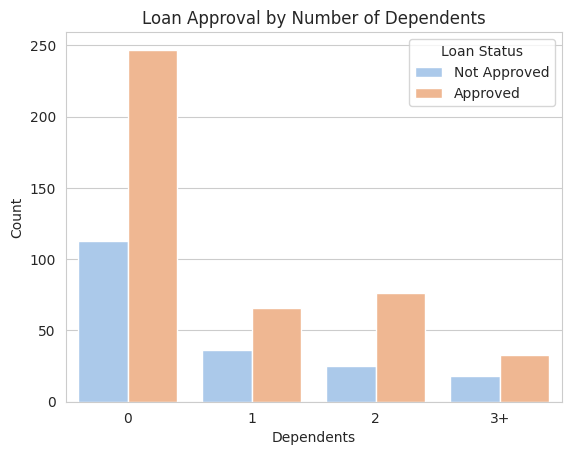

In [201]:
# Set style
sns.set_style("whitegrid")

# Define colors
palette = sns.color_palette("pastel")

# Create count plot
ax = sns.countplot(x="Dependents", hue="Loan_Status", data=df, palette=palette)

# Set title and labels
plt.title('Loan Approval by Number of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')

# Customize legend
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Not Approved', 'Approved'], title='Loan Status')

# Show plot
plt.show()

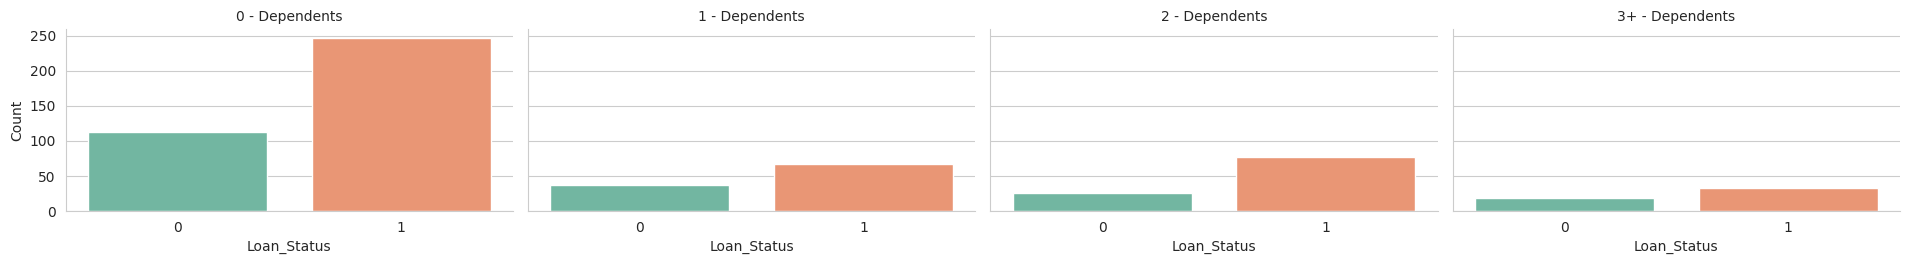

In [202]:
# Set style
sns.set_style("whitegrid")

# Define colors
palette = sns.color_palette("Set2")

# Create FacetGrid
grid = sns.FacetGrid(df, col='Dependents', aspect=1.6)

# Map countplot onto the grid
grid.map(sns.countplot, 'Loan_Status', palette=palette)

# Adjust titles and labels
grid.set_titles("{col_name} - Dependents")
grid.set_xlabels("Loan_Status")
grid.set_ylabels("Count")

# Adjust spacing between subplots
plt.subplots_adjust(top=0.8)

# Show plot
plt.show()

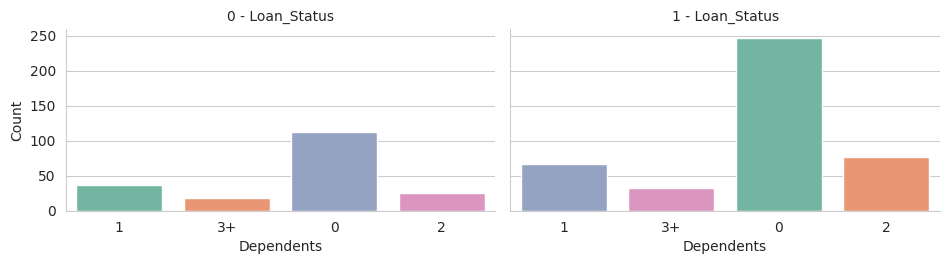

In [203]:
# Set style
sns.set_style("whitegrid")

# Define colors
palette = sns.color_palette("Set2")

# Create FacetGrid
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)

# Map countplot onto the grid
grid.map(sns.countplot, 'Dependents', palette=palette)

# Adjust titles and labels
grid.set_titles("{col_name} - Loan_Status")
grid.set_xlabels("Dependents")
grid.set_ylabels("Count")

# Adjust spacing between subplots
plt.subplots_adjust(top=0.8)

# Show plot
plt.show()

#we should drop the dependents as it has no relation with loan status

####**Education vs Loan Status Countplot**

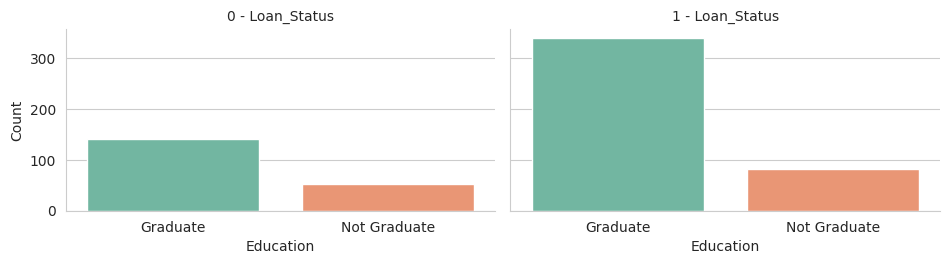

In [204]:
#Education Vs Loan Status

# Set style
sns.set_style("whitegrid")

# Define colors
palette = sns.color_palette("Set2")

# Create FacetGrid
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)

# Map countplot onto the grid
grid.map(sns.countplot, 'Education', palette=palette)

# Adjust titles and labels
grid.set_titles("{col_name} - Loan_Status")
grid.set_xlabels("Education")
grid.set_ylabels("Count")

# Adjust spacing between subplots
plt.subplots_adjust(top=0.8)

# Show plot
plt.show()


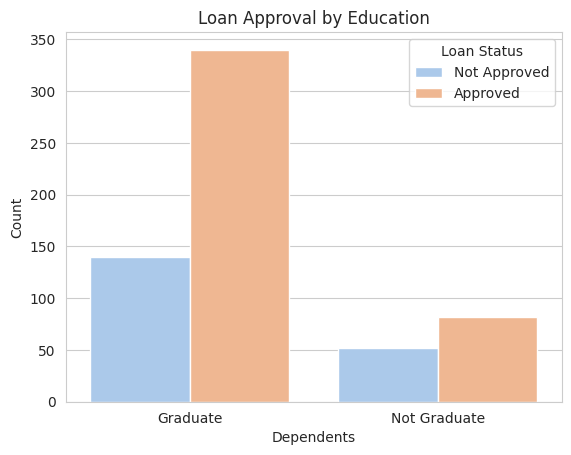

In [205]:
# Set style
sns.set_style("whitegrid")

# Define colors
palette = sns.color_palette("pastel")

# Create count plot
ax = sns.countplot(x="Education", hue="Loan_Status", data=df, palette=palette)

# Set title and labels
plt.title('Loan Approval by Education')
plt.xlabel('Dependents')
plt.ylabel('Count')

# Customize legend
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Not Approved', 'Approved'], title='Loan Status')

# Show plot
plt.show()

####**Self Employed vs Loan Status Countplot**

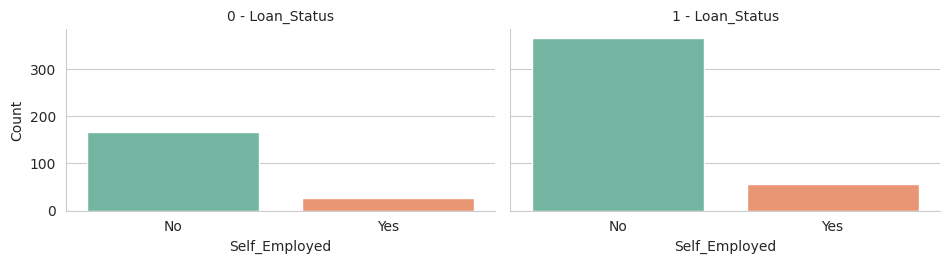

In [206]:
#Self_Employed Vs Loan Status

# Set style
sns.set_style("whitegrid")

# Define colors
palette = sns.color_palette("Set2")

# Create FacetGrid
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)

# Map countplot onto the grid
grid.map(sns.countplot, 'Self_Employed', palette=palette)

# Adjust titles and labels
grid.set_titles("{col_name} - Loan_Status")
grid.set_xlabels("Self_Employed")
grid.set_ylabels("Count")

# Adjust spacing between subplots
plt.subplots_adjust(top=0.8)

# Show plot
plt.show()

#people having job got loan easily

####**Property area vs Loan Status Countplot**

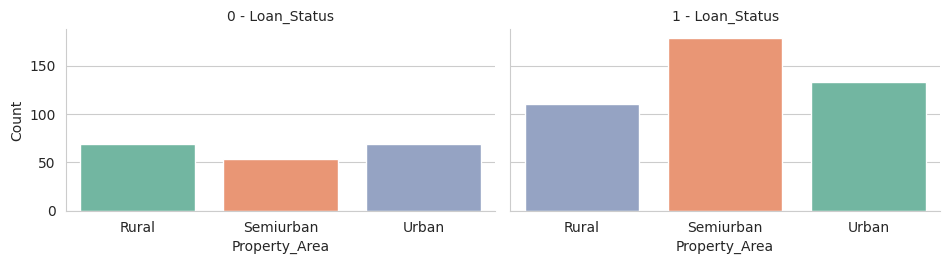

In [207]:
#Property_Area Vs Loan Status

# Set style
sns.set_style("whitegrid")

# Define colors
palette = sns.color_palette("Set2")

# Create FacetGrid
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)

# Map countplot onto the grid
grid.map(sns.countplot, 'Property_Area', palette=palette)

# Adjust titles and labels
grid.set_titles("{col_name} - Loan_Status")
grid.set_xlabels("Property_Area")
grid.set_ylabels("Count")

# Adjust spacing between subplots
plt.subplots_adjust(top=0.8)

# Show plot
plt.show()

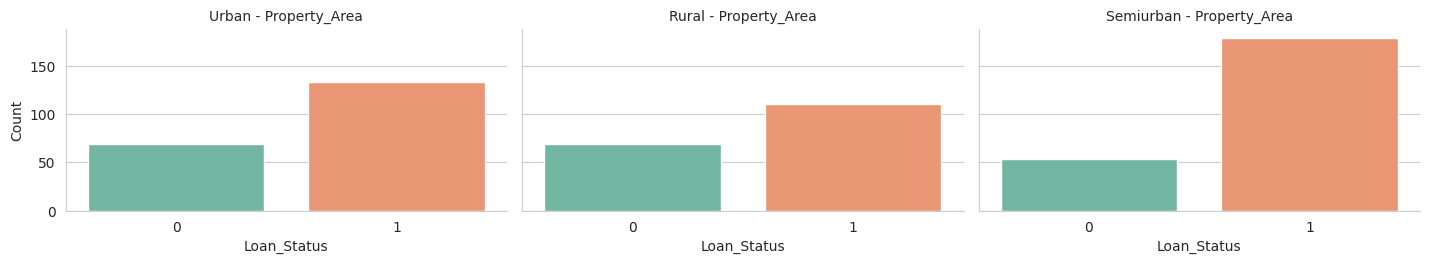

In [208]:
# Set style
sns.set_style("whitegrid")

# Define colors
palette = sns.color_palette("Set2")

# Create FacetGrid
grid = sns.FacetGrid(df, col='Property_Area', aspect=1.6)

# Map countplot onto the grid
grid.map(sns.countplot, 'Loan_Status', palette=palette)

# Adjust titles and labels
grid.set_titles("{col_name} - Property_Area")
grid.set_xlabels("Loan_Status")
grid.set_ylabels("Count")

# Adjust spacing between subplots
plt.subplots_adjust(top=0.8)

# Show plot
plt.show()

#Property area has impact on loan status

####**Created a new attribute using applicantincome and coapplicantincome attribute**

In [209]:
#Making new attribute by adding the applicantincome and Coapplicantincome
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


####**Total Income Distribution by Loan Status (Boxplot)**

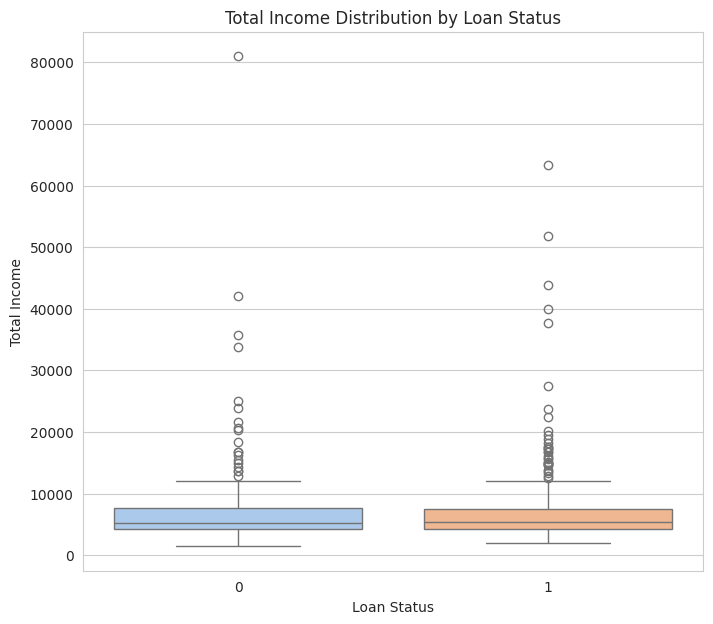

In [210]:
# Set style
sns.set_style("whitegrid")

# Set figure size
plt.figure(figsize=(8, 7))

# Define colors
colors = sns.color_palette("pastel")

# Plot
sns.boxplot(x="Loan_Status", y="Total_Income", data=df, palette=colors)

# Add labels and title
plt.title("Total Income Distribution by Loan Status", fontsize=12)
plt.xlabel("Loan Status", fontsize=10)
plt.ylabel("Total Income", fontsize=10)

# Adjust tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()

In [211]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

####**Loan Approval by Loan Amount Term (Count Plot)**

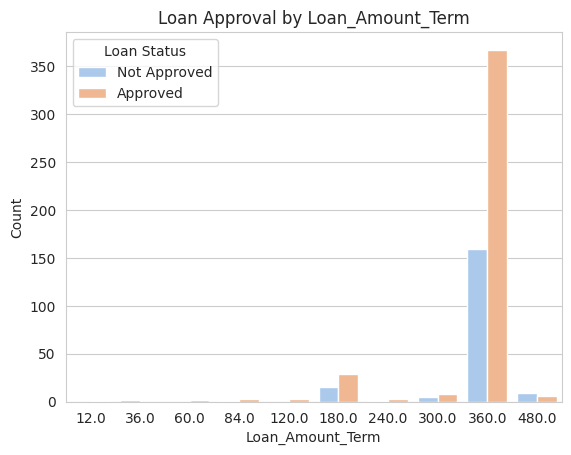

In [212]:
# Set style
sns.set_style("whitegrid")

# Define colors
palette = sns.color_palette("pastel")

# Create count plot
ax = sns.countplot(x="Loan_Amount_Term", hue="Loan_Status", data=df, palette=palette)

# Set title and labels
plt.title('Loan Approval by Loan_Amount_Term')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Count')

# Customize legend
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Not Approved', 'Approved'], title='Loan Status')

# Show plot
plt.show()

####**Loan Amount Distribution by Loan Status (Box Plot)**

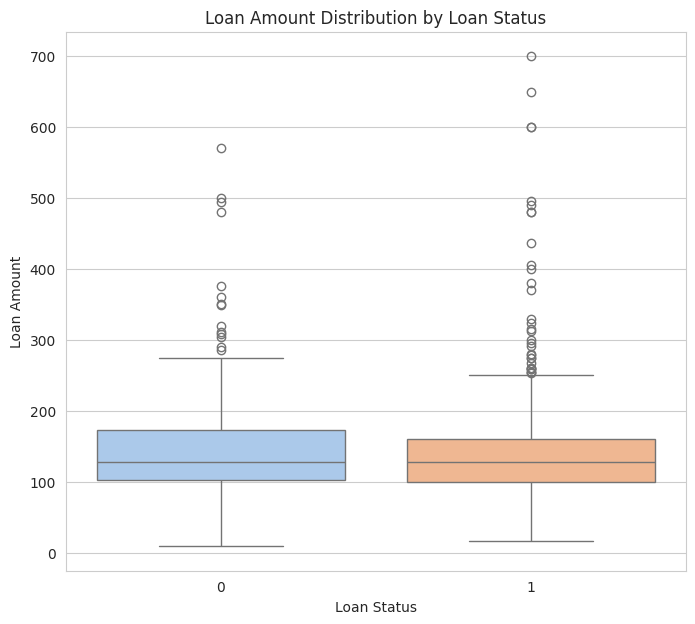

In [213]:
# Set style
sns.set_style("whitegrid")

# Set figure size
plt.figure(figsize=(8, 7))

# Define colors
colors = sns.color_palette("pastel")

# Plot
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette=colors)

# Add labels and title
plt.title("Loan Amount Distribution by Loan Status", fontsize=12)
plt.xlabel("Loan Status", fontsize=10)
plt.ylabel("Loan Amount", fontsize=10)

# Adjust tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()

##**Removed features that are useless.**

In [214]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncome', 'Dependents']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,1.0,Urban,1
1,Male,Yes,Graduate,No,1.0,Rural,0
2,Male,Yes,Graduate,Yes,1.0,Urban,1
3,Male,Yes,Not Graduate,No,1.0,Urban,1
4,Male,No,Graduate,No,1.0,Urban,1


##**Label Encoding for categorical**

In [215]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [216]:
df.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,1.0,2,1
1,1,1,0,0,1.0,0,0
2,1,1,0,1,1.0,2,1
3,1,1,1,0,1.0,2,1
4,1,0,0,0,1.0,2,1


In [217]:
#Specifying the target and feature attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

##**Checking for data imbalance**

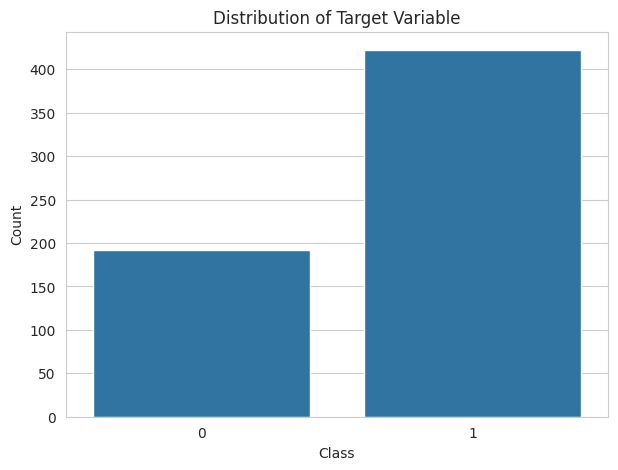

In [218]:
# Plot countplot of y_train
plt.figure(figsize=(7, 5))
sns.countplot(x=y)
plt.title("Distribution of Target Variable")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

##**Splitting the dataset**

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Extreme Gradient Boosting Model**

In [220]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(n_estimators=200, max_depth=2, learning_rate=1, objective='binary:logistic')

In [221]:
# Train the model on the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [222]:
# Make predictions on both training and test data
y_train_pred_xgb = xgb_classifier.predict(X_train)
y_test_pred_xgb = xgb_classifier.predict(X_test)

In [223]:
# Evaluation metrics for training data
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
train_precision_xgb = precision_score(y_train, y_train_pred_xgb)
train_recall_xgb = recall_score(y_train, y_train_pred_xgb)
train_f1_score_xgb = f1_score(y_train, y_train_pred_xgb)
tain_roc_auc_xgb = roc_auc_score(y_train, y_train_pred_xgb)
train_classification_report_xgb = classification_report(y_train, y_train_pred_xgb)
train_confusion_matrix_xgb = confusion_matrix(y_train, y_train_pred_xgb)

In [224]:
print("Training Metrics:")
print("Accuracy:", train_accuracy_xgb)
print("Precision:", train_precision_xgb)
print("Recall:", train_recall_xgb)
print("F1 Score:", train_f1_score_xgb)
print("AUC: ", tain_roc_auc_xgb)

Training Metrics:
Accuracy: 0.814663951120163
Precision: 0.7995226730310262
Recall: 0.97953216374269
F1 Score: 0.8804204993429697
AUC:  0.7078868872404724


In [225]:
print("Classification Report:")
print(train_classification_report_xgb)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.44      0.59       149
           1       0.80      0.98      0.88       342

    accuracy                           0.81       491
   macro avg       0.85      0.71      0.73       491
weighted avg       0.83      0.81      0.79       491



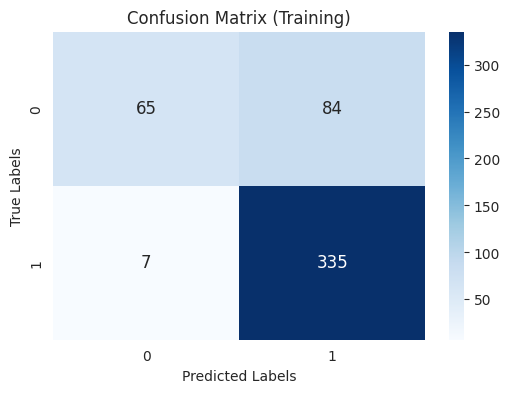

In [226]:
# Plot confusion matrix for training data
plt.figure(figsize=(6, 4))
sns.heatmap(train_confusion_matrix_xgb, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix (Training)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [227]:
# Evaluation metrics for testing data
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
test_precision_xgb = precision_score(y_test, y_test_pred_xgb)
test_recall_xgb = recall_score(y_test, y_test_pred_xgb)
test_f1_score_xgb = f1_score(y_test, y_test_pred_xgb)
test_roc_auc_xgb = roc_auc_score(y_test, y_test_pred_xgb)
test_classification_report_xgb = classification_report(y_test, y_test_pred_xgb)
test_confusion_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb)

In [228]:
print("\nTesting Metrics:")
print("Accuracy:", test_accuracy_xgb)
print("Precision:", test_precision_xgb)
print("Recall:", test_recall_xgb)
print("F1 Score:", test_f1_score_xgb)
print("AUC: ", test_roc_auc_xgb)


Testing Metrics:
Accuracy: 0.7723577235772358
Precision: 0.7549019607843137
Recall: 0.9625
F1 Score: 0.8461538461538461
AUC:  0.6905523255813952


In [229]:
print("Classification Report:")
print(test_classification_report_xgb)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



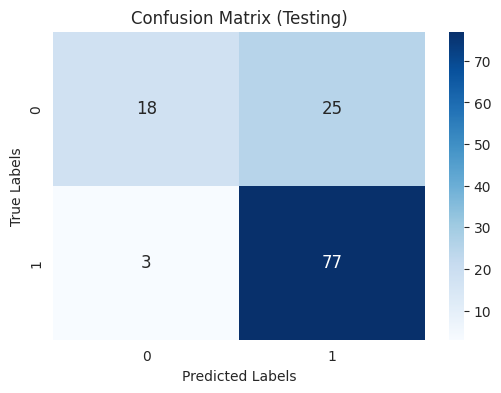

In [230]:
# Plot confusion matrix for testing data
# Plot confusion matrix for testing data
plt.figure(figsize=(6, 4))
sns.heatmap(test_confusion_matrix_xgb, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix (Testing)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

##**Logistic Regressor Model**

In [231]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression classifier with default parameters
logistic_classifier = LogisticRegression(
    penalty='l2',          # L2 regularization
    C=0.05,                 # Regularization strength
    solver='liblinear',    # Optimization solver
    multi_class='ovr',     # One-vs-rest strategy
    max_iter=1,          # Maximum number of iterations
    random_state=42
)

In [232]:
# Train the model on the training data
logistic_classifier.fit(X_train, y_train)

LogisticRegression(C=0.05, max_iter=1, multi_class='ovr', random_state=42,
                   solver='liblinear')

In [233]:
# Make predictions on both training and test data
y_train_pred_logistic = logistic_classifier.predict(X_train)
y_test_pred_logistic = logistic_classifier.predict(X_test)

In [234]:
# Evaluation metrics for training data
train_accuracy_logistic = accuracy_score(y_train, y_train_pred_logistic)
train_precision_logistic = precision_score(y_train, y_train_pred_logistic)
train_recall_logistic = recall_score(y_train, y_train_pred_logistic)
train_f1_score_logistic = f1_score(y_train, y_train_pred_logistic)
train_roc_auc_logistic = roc_auc_score(y_train, y_train_pred_logistic)
train_classification_report_logistic = classification_report(y_train, y_train_pred_logistic)
train_confusion_matrix_logistic = confusion_matrix(y_train, y_train_pred_logistic)

In [235]:
print("Training Metrics:")
print("Accuracy:", train_accuracy_logistic)
print("Precision:", train_precision_logistic)
print("Recall:", train_recall_logistic)
print("F1 Score:", train_f1_score_logistic)
print("AUC: ", train_roc_auc_logistic)

Training Metrics:
Accuracy: 0.7657841140529531
Precision: 0.7527839643652561
Recall: 0.9883040935672515
F1 Score: 0.854614412136536
AUC:  0.6216688253071156


In [236]:
print("Classification Report:")
print(train_classification_report_logistic)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.26      0.40       149
           1       0.75      0.99      0.85       342

    accuracy                           0.77       491
   macro avg       0.83      0.62      0.63       491
weighted avg       0.80      0.77      0.72       491



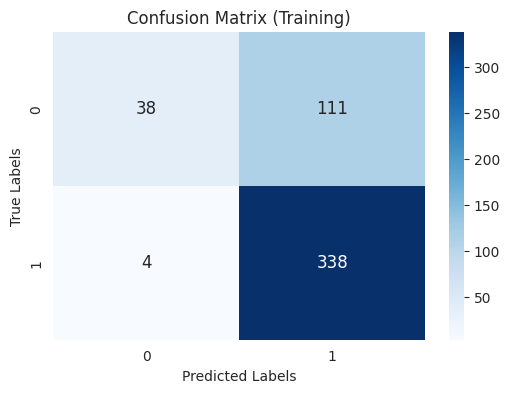

In [237]:
# Plot confusion matrix for training data
plt.figure(figsize=(6, 4))
sns.heatmap(train_confusion_matrix_logistic, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix (Training)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [238]:
# Evaluation metrics for testing data
test_accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)
test_precision_logistic = precision_score(y_test, y_test_pred_logistic)
test_recall_logistic = recall_score(y_test, y_test_pred_logistic)
test_f1_score_logistic = f1_score(y_test, y_test_pred_logistic)
test_roc_auc_logistic = roc_auc_score(y_test, y_test_pred_logistic)
test_classification_report_logistic = classification_report(y_test, y_test_pred_logistic)
test_confusion_matrix_logistic = confusion_matrix(y_test, y_test_pred_logistic)

In [239]:
print("\nTesting Metrics:")
print("Accuracy:", test_accuracy_logistic)
print("Precision:", test_precision_logistic)
print("Recall:", test_recall_logistic)
print("F1 Score:", test_f1_score_logistic)
print("AUC: ", test_roc_auc_logistic)


Testing Metrics:
Accuracy: 0.7154471544715447
Precision: 0.6956521739130435
Recall: 1.0
F1 Score: 0.8205128205128205
AUC:  0.5930232558139534


In [240]:
print("Classification Report:")
print(test_classification_report_logistic)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.19      0.31        43
           1       0.70      1.00      0.82        80

    accuracy                           0.72       123
   macro avg       0.85      0.59      0.57       123
weighted avg       0.80      0.72      0.64       123



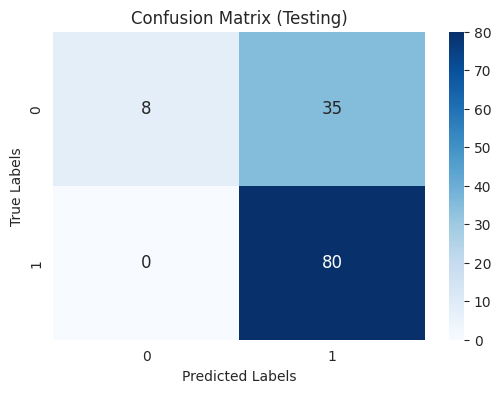

In [241]:
# Plot confusion matrix for testing data
plt.figure(figsize=(6, 4))
sns.heatmap(test_confusion_matrix_logistic, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix (Testing)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

##**K-nearest neighbor Model**

In [242]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier with default parameters
knn_classifier = KNeighborsClassifier()

In [243]:
# Train the model on the training data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [244]:
# Make predictions on both training and test data
y_train_pred_knn = knn_classifier.predict(X_train)
y_test_pred_knn = knn_classifier.predict(X_test)

In [245]:
# Evaluation metrics for training data
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
train_precision_knn = precision_score(y_train, y_train_pred_knn)
train_recall_knn = recall_score(y_train, y_train_pred_knn)
train_f1_score_knn = f1_score(y_train, y_train_pred_knn)
train_roc_auc_knn = roc_auc_score(y_train, y_train_pred_knn)
train_classification_report_knn = classification_report(y_train, y_train_pred_knn)
train_confusion_matrix_knn = confusion_matrix(y_train, y_train_pred_knn)

In [246]:
print("Training Metrics:")
print("Accuracy:", train_accuracy_knn)
print("Precision:", train_precision_knn)
print("Recall:", train_recall_knn)
print("F1 Score:", train_f1_score_knn)
print("AUC: ", train_roc_auc_knn)

Training Metrics:
Accuracy: 0.8065173116089613
Precision: 0.8034398034398035
Recall: 0.956140350877193
F1 Score: 0.8731642189586114
AUC:  0.7096137995996703


In [247]:
print("Classification Report:")
print(train_classification_report_knn)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.46      0.59       149
           1       0.80      0.96      0.87       342

    accuracy                           0.81       491
   macro avg       0.81      0.71      0.73       491
weighted avg       0.81      0.81      0.79       491



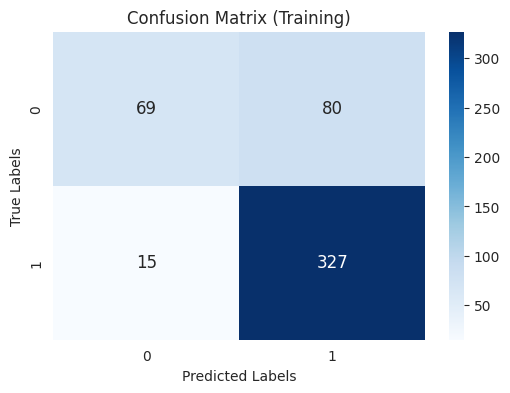

In [248]:
# Plot confusion matrix for training data
plt.figure(figsize=(6, 4))
sns.heatmap(train_confusion_matrix_knn, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix (Training)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [249]:
# Evaluation metrics for testing data
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
test_precision_knn = precision_score(y_test, y_test_pred_knn)
test_recall_knn = recall_score(y_test, y_test_pred_knn)
test_f1_score_knn = f1_score(y_test, y_test_pred_knn)
test_roc_auc_knn = roc_auc_score(y_test, y_test_pred_knn)
test_classification_report_knn = classification_report(y_test, y_test_pred_knn)
test_confusion_matrix_knn = confusion_matrix(y_test, y_test_pred_knn)

In [250]:
print("\nTesting Metrics:")
print("Accuracy:", test_accuracy_knn)
print("Precision:", test_precision_knn)
print("Recall:", test_recall_knn)
print("F1 Score:", test_f1_score_knn)
print("AUC: ", test_roc_auc_knn)


Testing Metrics:
Accuracy: 0.7804878048780488
Precision: 0.7676767676767676
Recall: 0.95
F1 Score: 0.8491620111731844
AUC:  0.7075581395348838


In [251]:
print("Classification Report:")
print(test_classification_report_knn)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.47      0.60        43
           1       0.77      0.95      0.85        80

    accuracy                           0.78       123
   macro avg       0.80      0.71      0.72       123
weighted avg       0.79      0.78      0.76       123



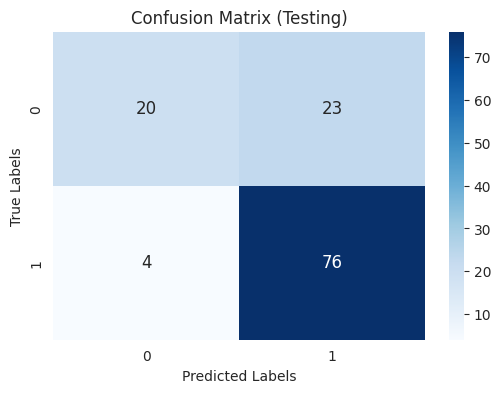

In [252]:
# Plot confusion matrix for testing data
plt.figure(figsize=(6, 4))
sns.heatmap(test_confusion_matrix_knn, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix (Testing)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

##**Naive Bayes Model**

In [253]:
from sklearn.naive_bayes import GaussianNB
class_priors = [0.6, 0.4]
# Create Gaussian Naive Bayes classifier
nb_classifier = GaussianNB(priors=class_priors)

In [254]:
# Train the model on the training data
nb_classifier.fit(X_train, y_train)

GaussianNB(priors=[0.6, 0.4])

In [255]:
# Make predictions on both training and test data
y_train_pred_nb = nb_classifier.predict(X_train)
y_test_pred_nb = nb_classifier.predict(X_test)

In [256]:
# Evaluation metrics for training data
train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
train_precision_nb = precision_score(y_train, y_train_pred_nb)
train_recall_nb = recall_score(y_train, y_train_pred_nb)
train_f1_score_nb = f1_score(y_train, y_train_pred_nb)
train_roc_auc_nb = roc_auc_score(y_train, y_train_pred_nb)
train_classification_report_nb = classification_report(y_train, y_train_pred_nb)
train_confusion_matrix_nb = confusion_matrix(y_train, y_train_pred_nb)

In [257]:
print("Training Metrics:")
print("Accuracy:", train_accuracy_nb)
print("Precision:", train_precision_nb)
print("Recall:", train_recall_nb)
print("F1 Score:", train_f1_score_nb)
print("AUC: ", train_roc_auc_nb)

Training Metrics:
Accuracy: 0.814663951120163
Precision: 0.7980997624703088
Recall: 0.9824561403508771
F1 Score: 0.8807339449541285
AUC:  0.7059931708465795


In [258]:
print("Classification Report:")
print(train_classification_report_nb)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.43      0.58       149
           1       0.80      0.98      0.88       342

    accuracy                           0.81       491
   macro avg       0.86      0.71      0.73       491
weighted avg       0.83      0.81      0.79       491



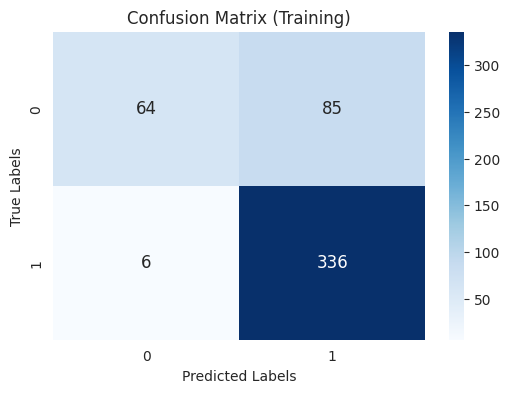

In [259]:
# Plot confusion matrix for training data
plt.figure(figsize=(6, 4))
sns.heatmap(train_confusion_matrix_nb, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix (Training)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [260]:
# Evaluation metrics for testing data
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
test_precision_nb = precision_score(y_test, y_test_pred_nb)
test_recall_nb = recall_score(y_test, y_test_pred_nb)
test_f1_score_nb = f1_score(y_test, y_test_pred_nb)
test_roc_auc_nb = roc_auc_score(y_test, y_test_pred_nb)
test_classification_report_nb = classification_report(y_test, y_test_pred_nb)
test_confusion_matrix_nb = confusion_matrix(y_test, y_test_pred_nb)

In [261]:
print("\nTesting Metrics:")
print("Accuracy:", test_accuracy_nb)
print("Precision:", test_precision_nb)
print("Recall:", test_recall_nb)
print("F1 Score:", test_f1_score_nb)
print("AUC: ", test_roc_auc_nb)


Testing Metrics:
Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1 Score: 0.8586956521739131
AUC:  0.7030523255813954


In [262]:
print("Classification Report:")
print(test_classification_report_nb)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



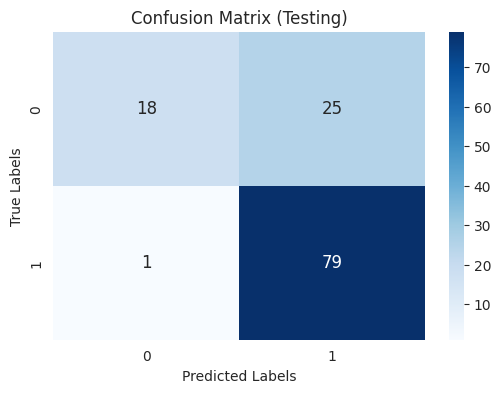

In [263]:
# Plot confusion matrix for testing data
plt.figure(figsize=(6, 4))
sns.heatmap(test_confusion_matrix_nb, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix (Testing)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

##**RandomForest Model**

In [264]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(
     n_estimators=1,
     max_depth=5,
     min_samples_split=100,
     min_samples_leaf=5,
     max_features=0.5,
     random_state=42
)

In [265]:
# Train the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=0.5, min_samples_leaf=5,
                       min_samples_split=100, n_estimators=1, random_state=42)

In [266]:
# Make predictions on both training and test data
y_train_pred_rf = rf_classifier.predict(X_train)
y_test_pred_rf = rf_classifier.predict(X_test)

In [267]:
# Evaluation metrics for training data
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf)
train_recall_rf = recall_score(y_train, y_train_pred_rf)
train_f1_score_rf = f1_score(y_train, y_train_pred_rf)
train_roc_auc_rf = roc_auc_score(y_train, y_train_pred_rf)
train_classification_report_rf = classification_report(y_train, y_train_pred_rf)
train_confusion_matrix_rf = confusion_matrix(y_train, y_train_pred_rf)

In [268]:
print("Training Metrics:")
print("Accuracy:", train_accuracy_rf)
print("Precision:", train_precision_rf)
print("Recall:", train_recall_rf)
print("F1 Score:", train_f1_score_rf)
print("AUC: ", train_roc_auc_rf)

Training Metrics:
Accuracy: 0.7718940936863544
Precision: 0.7566964285714286
Recall: 0.9912280701754386
F1 Score: 0.8582278481012658
AUC:  0.6298422230071823


In [269]:
print("Classification Report:")
print(train_classification_report_rf)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.27      0.42       149
           1       0.76      0.99      0.86       342

    accuracy                           0.77       491
   macro avg       0.84      0.63      0.64       491
weighted avg       0.81      0.77      0.72       491



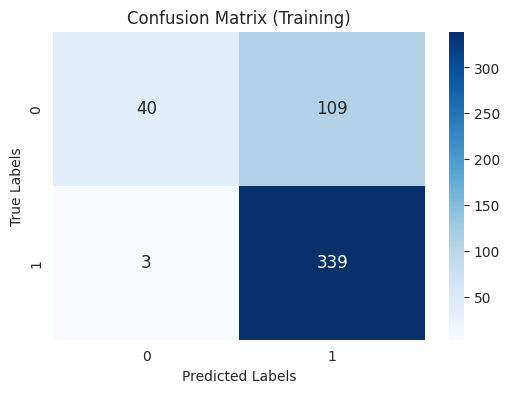

In [270]:
# Plot confusion matrix for training data
plt.figure(figsize=(6, 4))
sns.heatmap(train_confusion_matrix_rf, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix (Training)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [271]:
# Evaluation metrics for testing data
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_f1_score_rf = f1_score(y_test, y_test_pred_rf)
test_roc_auc_rf = roc_auc_score(y_test, y_test_pred_rf)
test_classification_report_rf = classification_report(y_test, y_test_pred_rf)
test_confusion_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)

In [272]:
print("\nTesting Metrics:")
print("Accuracy:", test_accuracy_rf)
print("Precision:", test_precision_rf)
print("Recall:", test_recall_rf)
print("F1 Score:", test_f1_score_rf)
print("AUC: ", test_roc_auc_rf)


Testing Metrics:
Accuracy: 0.7479674796747967
Precision: 0.7247706422018348
Recall: 0.9875
F1 Score: 0.8359788359788359
AUC:  0.6449127906976744


In [273]:
print("Classification Report:")
print(test_classification_report_rf)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.30      0.46        43
           1       0.72      0.99      0.84        80

    accuracy                           0.75       123
   macro avg       0.83      0.64      0.65       123
weighted avg       0.80      0.75      0.70       123



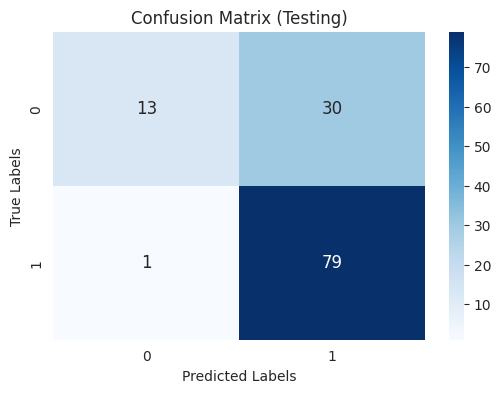

In [274]:
# Plot confusion matrix for testing data
plt.figure(figsize=(6, 4))
sns.heatmap(test_confusion_matrix_rf, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix (Testing)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

##**ROC Curves for Different Machine Learning Models**

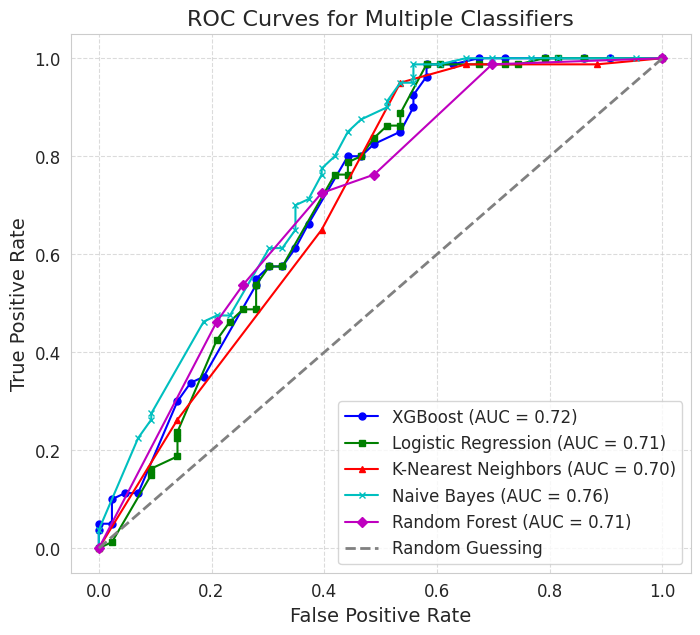

In [275]:
# Define colors and markers for each model
colors = ['b', 'g', 'r', 'c', 'm']
markers = ['o', 's', '^', 'x', 'D']

# Initialize a dictionary to store AUC scores for each model
auc_scores = {}

# Define classifiers and their corresponding predictions
classifiers = {
    'XGBoost': (xgb_classifier, y_test_pred_xgb),
    'Logistic Regression': (logistic_classifier, y_test_pred_logistic),
    'K-Nearest Neighbors': (knn_classifier, y_test_pred_knn),
    'Naive Bayes': (nb_classifier, y_test_pred_nb),
    'Random Forest': (rf_classifier, y_test_pred_rf)
}

# Plot ROC curves for each model
plt.figure(figsize=(8, 7))

for i, (name, (classifier, y_pred)) in enumerate(classifiers.items()):
    # Compute predicted probabilities
    if hasattr(classifier, 'predict_proba'):
        y_probs = classifier.predict_proba(X_test)[:, 1]
    else:
        y_probs = classifier.decision_function(X_test)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)

    # Compute AUC score
    auc = roc_auc_score(y_test, y_probs)
    auc_scores[name] = auc

    # Plot ROC curve with custom styling
    plt.plot(fpr, tpr, color=colors[i], linestyle='-', marker=markers[i], markersize=5, label=f'{name} (AUC = {auc:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guessing')

# Add labels and legend
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Multiple Classifiers', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)

# Set grid and ticks parameters
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

##**Evaluation Metrics for Different Machine Learning Models (Testing Data)**

In [276]:
# Define models
models = ['XGBoost', 'Logistic Regression', 'K-Nearest Neighbors', 'Naive Bayes', 'Random Forest']

# Define evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC']

# Define testing scores for each model and metric
test_scores = {
    'XGBoost': [test_accuracy_xgb, test_precision_xgb, test_recall_xgb, test_f1_score_xgb,test_roc_auc_xgb],
    'Logistic Regression': [test_accuracy_logistic, test_precision_logistic, test_recall_logistic, test_f1_score_logistic,test_roc_auc_logistic],
    'K-Nearest Neighbors': [test_accuracy_knn, test_precision_knn, test_recall_knn, test_f1_score_knn,test_roc_auc_knn],
    'Naive Bayes': [test_accuracy_nb, test_precision_nb, test_recall_nb, test_f1_score_nb,test_roc_auc_nb],
    'Random Forest': [test_accuracy_rf, test_precision_rf, test_recall_rf, test_f1_score_rf,test_roc_auc_rf]
}

In [277]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(test_scores, orient='index', columns=metrics)

df

,Accuracy,Precision,Recall,F1 Score,ROC_AUC
XGBoost,0.772358,0.754902,0.9625,0.846154,0.690552
Logistic Regression,0.715447,0.695652,1.0000,0.820513,0.593023
K-Nearest Neighbors,0.780488,0.767677,0.9500,0.849162,0.707558
Naive Bayes,0.788618,0.759615,0.9875,0.858696,0.703052
Random Forest,0.747967,0.724771,0.9875,0.835979,0.644913


In [278]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add bar traces for each model and metric
for i, metric in enumerate(metrics):
    scores = [test_scores[model][i] for model in models]
    text_values = [f'{score:.2f}' for score in scores]  # Format scores to two decimal places
    fig.add_trace(go.Bar(
        x=models,
        y=scores,
        name=metric,
        text=text_values,  # Add formatted text to display values on top of the bars
        textposition='outside',  # Position text outside of the bars
        textangle=0  # Rotate text to be horizontal
    ))

# Update layout
fig.update_layout(
    title='Evaluation Metrics for Different Models',
    xaxis_title='Model',
    yaxis_title='Score',
    barmode='group',
    legend_title='Metric'
)

# Show figure
fig.show()
